In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
#csv = "/Users/alexandranava/Desktop/Spores/Analysis/sensitivity_featurestd.csv"
csv = "/Users/alexandranava/Desktop/Spores/Analysis/sensitivity_gaussian.csv"

df = pd.read_csv(csv)
print(df.columns)
true_model_accuracy = 94.4444

Index(['Feature', 'Accuracy', 'STD', 'Delta x'], dtype='object')


### Feature Sensitivity Analysis

In [10]:
df["Change Accuracy"] = true_model_accuracy - df["Accuracy"]
df["SI"] = df["Change Accuracy"]/df["Delta x"]

[ 1  2  5 10 20]


([<matplotlib.axis.YTick at 0x15ef35d90>,
 [Text(0, 0, '0%'),
  Text(0, 20, '20%'),
  Text(0, 40, '40%'),
  Text(0, 60, '60%'),
  Text(0, 80, '80%'),
  Text(0, 100, '100%')])

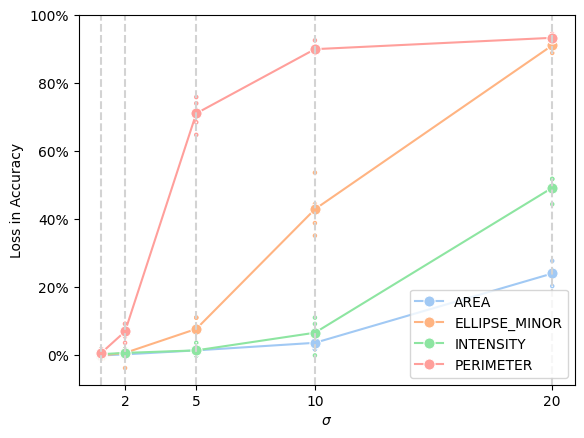

In [11]:
sigmas = df["STD"].unique()
print(sigmas)


feature_colors = sns.color_palette("pastel", (len(df["Feature"].unique())))
mean_changeaccuracy_df = df.groupby(["Feature", "STD"])["Change Accuracy"].mean().reset_index()
sns.lineplot(data=mean_changeaccuracy_df, x="STD", y="Change Accuracy", hue="Feature", marker="o", palette="pastel", markersize = 8)

color_index = 0
for feature, group in df.groupby(["Feature"]):
  plt.scatter(group["STD"], group["Change Accuracy"], color=feature_colors[color_index], facecolors = "none", s= 5)
  color_index += 1

#vertical line at each std 
for sigma in list(sigmas):
  plt.axvline(sigma, color = "lightgrey", linestyle = "--")
plt.legend(loc = "best")

#xaxis formatting
plt.xlabel(r"$\sigma$")
plt.xticks(sigmas[1:])
#yaxis formatting
plt.ylabel(r"Loss in Accuracy")
plt.yticks([0, 20, 40, 60, 80, 100], ["0%", "20%", "40%", "60%", "80%", "100%"])

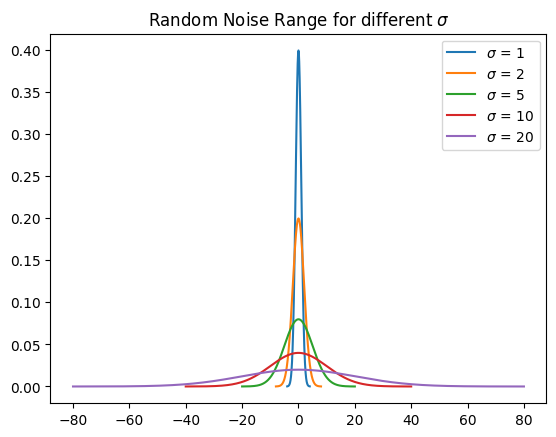

In [12]:
from scipy.stats import norm
for std_val in sigmas:
     mean = 0 
     x = np.linspace(mean - 4*std_val, mean + 4*std_val, 1000)
     y = norm.pdf(x, 0, std_val)
     plt.plot(x, y, label=f'$\sigma$ = {std_val}')
plt.title(rf"Random Noise Range for different $\sigma$")
plt.legend()
plt.show()
plt.close()